In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [166]:
df = pd.read_csv('LUBS5990M_courseworkData_202425.csv')

In [167]:
df.head()

,country,ico_start,ico_end,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,...,pre_ico_end,pre_ico_price_usd,accepting,link_white_paper,linkedin_link,github_link,website,rating,teamsize,ERC20
0,India,10/08/2020,31/12/2020,0.01,Y,0.5,1.00E+08,500000000.0,Yes,1.0,...,NaN,5.00E-03,"BTC, ETH, and Fiat currency",NaN,https://www.linkedin.com/company/bitfinex-limi...,NaN,NaN,4.0,NaN,1.0
1,Cyprus,01/08/2020,31/12/2020,0.1,N,0.6,NaN,84000000.0,No,1.0,...,31/10/2019,NaN,"ETH, BTC",https://www.tycoon.io/whitepaper.pdf,https://www.linkedin.com/company/tycoonio/about/,https://www.github.com/tycoon?tab=repositories,https://www.tycoon.io?utm_source=icobench,4.8,14.0,1.0
2,UK,01/03/2019,31/12/2020,0.14,Y,0.5,NaN,75000000.0,No,0.0,...,15/01/2019,NaN,"ETH, BTC, LTC",https://mindsync.ai/docs/whitepaper.pdf,https://www.linkedin.com/company/mindsync/,NaN,NaN,4.5,14.0,1.0
3,UK,25/06/2020,31/01/2021,0.1,N,0.5,NaN,500000000.0,Yes,1.0,...,NaN,0.1,"BTC, ETH, XRP, BNB, LTC, XLM, USDT, BCH, TRX, EOS",https://cdn.pointpay.io/WhitePaper__en.pdf?cac...,https://www.linkedin.com/company/pointpay/about/,NaN,NaN,4.7,43.0,1.0
4,Seychelles,NaN,NaN,0.06,N,0.4,NaN,400000000.0,Yes,1.0,...,NaN,0.03,ETH,https://lohncontrol.com/down/LOHN-white-paper-...,https://www.linkedin.com/showcase/lohncontrol,https://www.github.com/lohn7?tab=repositories,https://lohncontrol.com?utm_source=icobench,4.4,16.0,1.0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             6124 non-null   object 
 1   ico_start           5378 non-null   object 
 2   ico_end             5242 non-null   object 
 3   price_usd           5662 non-null   object 
 4   success             6146 non-null   object 
 5   distributed_in_ico  4661 non-null   object 
 6   sold_tokens         180 non-null    object 
 7   token_for_sale      4908 non-null   float64
 8   whitelist           3712 non-null   object 
 9   kyc                 6125 non-null   float64
 10  bonus               6125 non-null   float64
 11  restricted_areas    1954 non-null   object 
 12  min_investment      1984 non-null   object 
 13  mvp                 1243 non-null   object 
 14  pre_ico_start       2605 non-null   object 
 15  pre_ico_end         2593 non-null   object 
 16  pre_ic

In [169]:
df['ico_end'] = pd.to_datetime(df['ico_end'], errors='coerce')
df['ico_start'] = pd.to_datetime(df['ico_start'], errors='coerce')
df['pre_ico_end'] = pd.to_datetime(df['pre_ico_end'], errors='coerce')
df['pre_ico_start'] = pd.to_datetime(df['pre_ico_start'], errors='coerce')

/var/folders/zm/k7mfmhq51gv7d8g3r5dwtjj00000gn/T/ipykernel_85547/2627794655.py:1: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

/var/folders/zm/k7mfmhq51gv7d8g3r5dwtjj00000gn/T/ipykernel_85547/2627794655.py:3: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

/var/folders/zm/k7mfmhq51gv7d8g3r5dwtjj00000gn/T/ipykernel_85547/2627794655.py:4: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [170]:
# Calculate the length of the ICO
df['ico_length'] = df['ico_end'] - df['ico_start']
df['pre_ico_length'] = df['pre_ico_end'] - df['pre_ico_start']
df['ico_length'] = df['ico_length'].dt.days
df['pre_ico_length'] = df['pre_ico_length'].dt.days
df.drop(columns=['ico_start', 'pre_ico_start', 'ico_end', 'pre_ico_end'], inplace=True)

In [171]:
df['success'] = df['success'].map({'Y': 1, 'N': 0})
df['whitelist'] = df['whitelist'].map({'Yes': 1, 'No': 0})


In [172]:
df['link_white_paper'] = np.where(df['link_white_paper'].isna(), 0, 1)
df['github_link'] = np.where(df['github_link'].isna(), 0, 1)
df['website'] = np.where(df['website'].isna(), 0, 1)
df['linkedin_link'] = np.where(df['linkedin_link'].isna(), 0, 1)

In [173]:
df.head()

,country,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,bonus,restricted_areas,...,accepting,link_white_paper,linkedin_link,github_link,website,rating,teamsize,ERC20,ico_length,pre_ico_length
0,India,0.01,1,0.5,1.00E+08,500000000.0,1.0,1.0,1.0,"Pakistan, Turkey, Somalia, Sirya, Sudan",...,"BTC, ETH, and Fiat currency",0,1,0,0,4.0,NaN,1.0,84.0,NaN
1,Cyprus,0.1,0,0.6,NaN,84000000.0,0.0,1.0,0.0,USA,...,"ETH, BTC",1,1,1,1,4.8,14.0,1.0,358.0,101.0
2,UK,0.14,1,0.5,NaN,75000000.0,0.0,0.0,1.0,"Cuba, Iran, Lebanon, Syria, Libya, Sudan, Soma...",...,"ETH, BTC, LTC",1,1,0,0,4.5,14.0,1.0,728.0,31.0
3,UK,0.1,0,0.5,NaN,500000000.0,1.0,1.0,1.0,"Cuba, Iran, Lebanon, Syria, Libya, Sudan, Soma...",...,"BTC, ETH, XRP, BNB, LTC, XLM, USDT, BCH, TRX, EOS",1,1,0,0,4.7,43.0,1.0,NaN,NaN
4,Seychelles,0.06,0,0.4,NaN,400000000.0,1.0,1.0,1.0,"USA, CANADA, CHINA, SOUTH KOREA, SEYCHELLES",...,ETH,1,1,1,1,4.4,16.0,1.0,NaN,NaN


In [174]:
df['accepting'] = df['accepting'].str.replace('and', '').str.strip()

accepting_dummies = df['accepting'].str.get_dummies(sep=',')


In [175]:
threshold = df.shape[0] * 0.01
accepting_dummies = accepting_dummies.loc[:, accepting_dummies.sum() > threshold]
df = pd.concat([df, accepting_dummies], axis=1)
df.head()

,country,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,bonus,restricted_areas,...,EUR,Fiat,LTC,USD,USDT,XMR,XRP,ZEC,BTC,ETH
0,India,0.01,1,0.5,1.00E+08,500000000.0,1.0,1.0,1.0,"Pakistan, Turkey, Somalia, Sirya, Sudan",...,0,0,0,0,0,0,0,0,1,0
1,Cyprus,0.1,0,0.6,NaN,84000000.0,0.0,1.0,0.0,USA,...,0,0,0,0,0,0,0,0,0,1
2,UK,0.14,1,0.5,NaN,75000000.0,0.0,0.0,1.0,"Cuba, Iran, Lebanon, Syria, Libya, Sudan, Soma...",...,0,0,1,0,0,0,0,0,0,1
3,UK,0.1,0,0.5,NaN,500000000.0,1.0,1.0,1.0,"Cuba, Iran, Lebanon, Syria, Libya, Sudan, Soma...",...,0,0,1,0,1,0,1,0,1,0
4,Seychelles,0.06,0,0.4,NaN,400000000.0,1.0,1.0,1.0,"USA, CANADA, CHINA, SOUTH KOREA, SEYCHELLES",...,0,0,0,0,0,0,0,0,0,1


In [176]:
def returnlist(row):
    if isinstance(row, str) and pd.notna(row): 
        return [country.strip() for country in row.split(',')]  
    return row  

df['restricted_areas'] = df['restricted_areas'].apply(returnlist)

In [177]:
df['restricted_areas']

0               [Pakistan, Turkey, Somalia, Sirya, Sudan]
1                                                   [USA]
2       [Cuba, Iran, Lebanon, Syria, Libya, Sudan, Som...
3       [Cuba, Iran, Lebanon, Syria, Libya, Sudan, Som...
4           [USA, CANADA, CHINA, SOUTH KOREA, SEYCHELLES]
                              ...                        
6141                                                  NaN
6142                                                  NaN
6143                                                  NaN
6144                                                  NaN
6145                                                  NaN
Name: restricted_areas, Length: 6146, dtype: object

In [178]:
import country_converter as coco
cc = coco.CountryConverter()


In [179]:
df.head()

,country,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,bonus,restricted_areas,...,EUR,Fiat,LTC,USD,USDT,XMR,XRP,ZEC,BTC,ETH
0,India,0.01,1,0.5,1.00E+08,500000000.0,1.0,1.0,1.0,"[Pakistan, Turkey, Somalia, Sirya, Sudan]",...,0,0,0,0,0,0,0,0,1,0
1,Cyprus,0.1,0,0.6,NaN,84000000.0,0.0,1.0,0.0,[USA],...,0,0,0,0,0,0,0,0,0,1
2,UK,0.14,1,0.5,NaN,75000000.0,0.0,0.0,1.0,"[Cuba, Iran, Lebanon, Syria, Libya, Sudan, Som...",...,0,0,1,0,0,0,0,0,0,1
3,UK,0.1,0,0.5,NaN,500000000.0,1.0,1.0,1.0,"[Cuba, Iran, Lebanon, Syria, Libya, Sudan, Som...",...,0,0,1,0,1,0,1,0,1,0
4,Seychelles,0.06,0,0.4,NaN,400000000.0,1.0,1.0,1.0,"[USA, CANADA, CHINA, SOUTH KOREA, SEYCHELLES]",...,0,0,0,0,0,0,0,0,0,1


In [180]:
# Explode the restricted_areas column so that each country is in its own row
df_exploded = df.explode('restricted_areas')

# Convert the countries to ISO3 codes
iso3_codes = cc.pandas_convert(series=pd.Series(df_exploded['restricted_areas']), to='ISO3')

Sirya not found in regex
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match for Russian Federation and North Korea
More than one regular expression match 

In [181]:
iso3_codes

0             PAK
0             TUR
0             SOM
0       not found
0             SDN
          ...    
6141    not found
6142    not found
6143    not found
6144    not found
6145    not found
Name: restricted_areas, Length: 11805, dtype: object

In [182]:

# Add the iso3_codes column to df_exploded
df_exploded['iso3_codes'] = iso3_codes.values

df_exploded['iso3_codes']

0             PAK
0             TUR
0             SOM
0       not found
0             SDN
          ...    
6141    not found
6142    not found
6143    not found
6144    not found
6145    not found
Name: iso3_codes, Length: 11805, dtype: object

In [183]:
restricted_areas = df_exploded.groupby(df_exploded.index).agg({'iso3_codes': lambda x: ",".join(x.fillna('').astype(str))})

In [184]:
restricted_areas

,iso3_codes
0,"PAK,TUR,SOM,not found,SDN"
1,USA
2,"CUB,IRN,LBN,SYR,LBY,SDN,SOM,UKR,EST,['PRK', 'R..."
3,"CUB,IRN,LBN,SYR,LBY,SDN,['PRK', 'SOM'],YEM"
4,"USA,CAN,CHN,KOR,SYC"
...,...
6141,not found
6142,not found
6143,not found
6144,not found


In [185]:
df['restricted_areas'] = restricted_areas['iso3_codes'].values

In [186]:
df['restricted_areas'] = df['restricted_areas'].str.replace(r"[\[\]']", '', regex=True)

In [187]:
areas_dummies = df['restricted_areas'].str.get_dummies(sep=',')
threshold = df.shape[0] * 0.01
areas_dummies = areas_dummies.loc[:, areas_dummies.sum() > threshold]
df = pd.concat([df, areas_dummies], axis=1)
df.head()

,country,price_usd,success,distributed_in_ico,sold_tokens,token_for_sale,whitelist,kyc,bonus,restricted_areas,...,PAK,PRK,SDN,SGP,SOM,SYR,TUN,USA,YEM,not found
0,India,0.01,1,0.5,1.00E+08,500000000.0,1.0,1.0,1.0,"PAK,TUR,SOM,not found,SDN",...,1,0,1,0,1,0,0,0,0,1
1,Cyprus,0.1,0,0.6,NaN,84000000.0,0.0,1.0,0.0,USA,...,0,0,0,0,0,0,0,1,0,0
2,UK,0.14,1,0.5,NaN,75000000.0,0.0,0.0,1.0,"CUB,IRN,LBN,SYR,LBY,SDN,SOM,UKR,EST,PRK, RUS",...,0,1,1,0,1,1,0,0,0,0
3,UK,0.1,0,0.5,NaN,500000000.0,1.0,1.0,1.0,"CUB,IRN,LBN,SYR,LBY,SDN,PRK, SOM,YEM",...,0,1,1,0,0,1,0,0,1,0
4,Seychelles,0.06,0,0.4,NaN,400000000.0,1.0,1.0,1.0,"USA,CAN,CHN,KOR,SYC",...,0,0,0,0,0,0,0,1,0,0


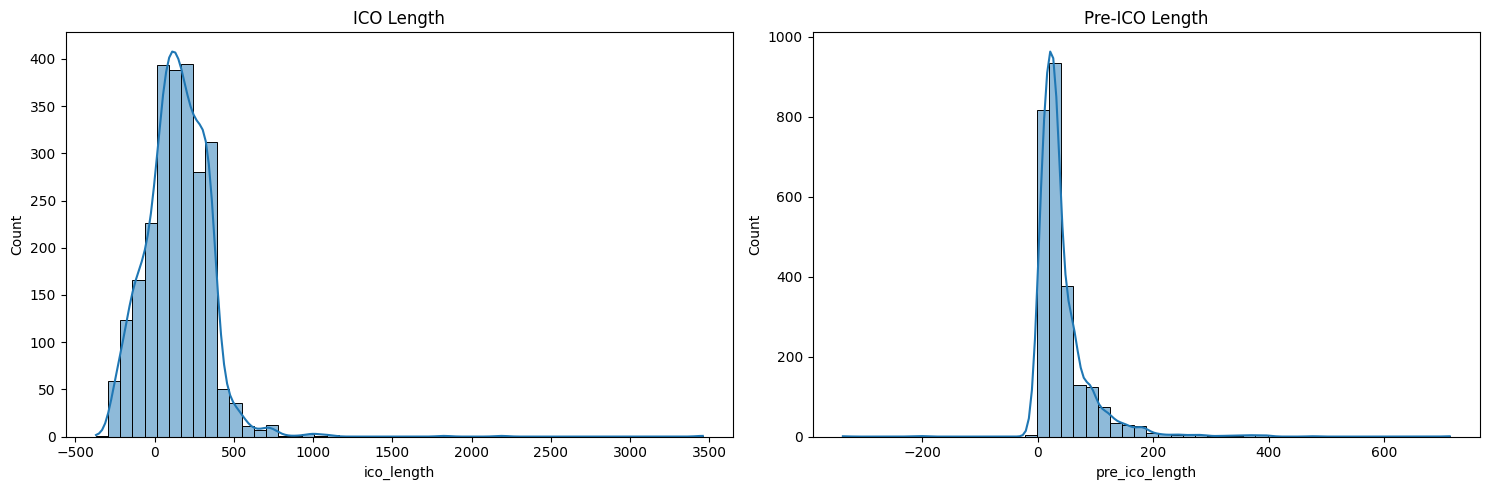

In [188]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['ico_length'], bins=50, kde=True, ax=ax[0])
sns.histplot(df['pre_ico_length'], bins=50, kde=True, ax=ax[1])
ax[0].set_title('ICO Length')
ax[1].set_title('Pre-ICO Length')
plt.tight_layout()

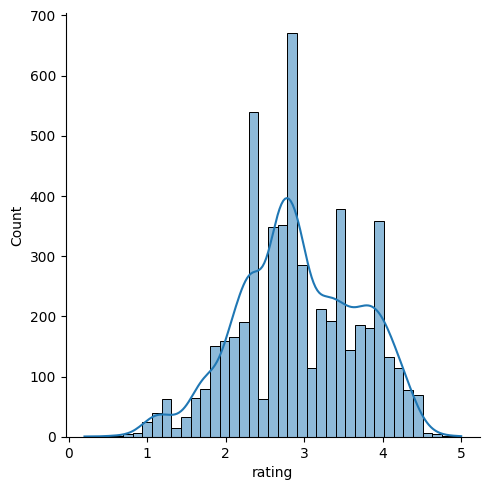

In [189]:
sns.displot(df['rating'], kde=True)

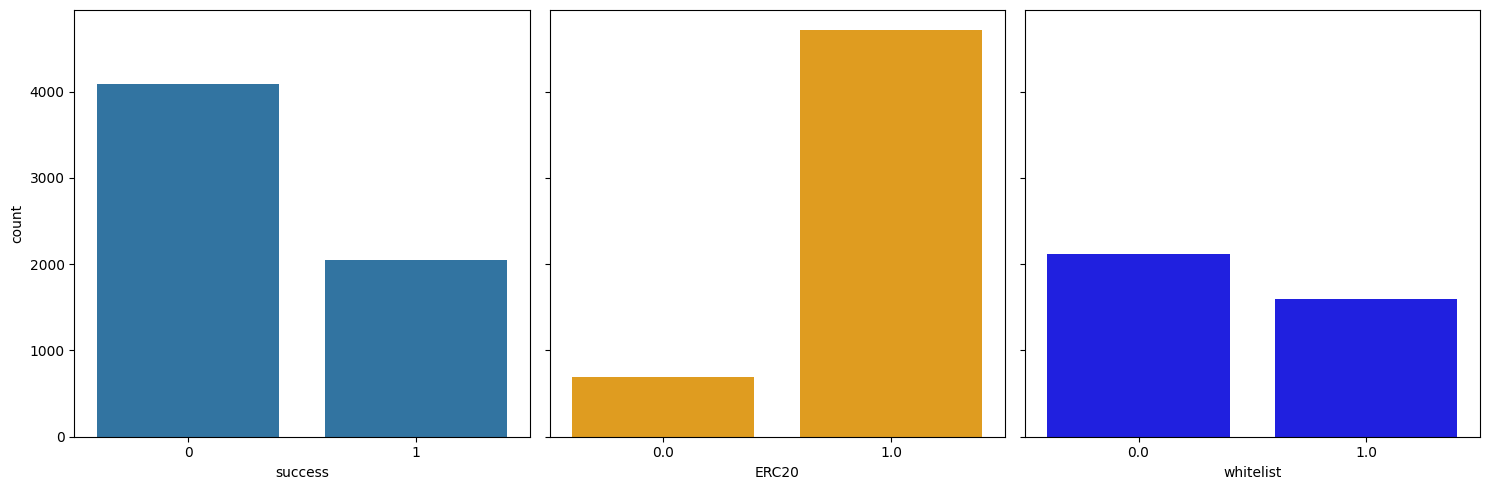

In [190]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.countplot(data=df, x='success', ax=ax[0])
sns.countplot(data=df, x='ERC20', ax=ax[1], color='orange')
sns.countplot(data=df, x='whitelist', ax=ax[2], color='blue')
plt.tight_layout()

<Axes: xlabel='distributed_in_ico', ylabel='success'>

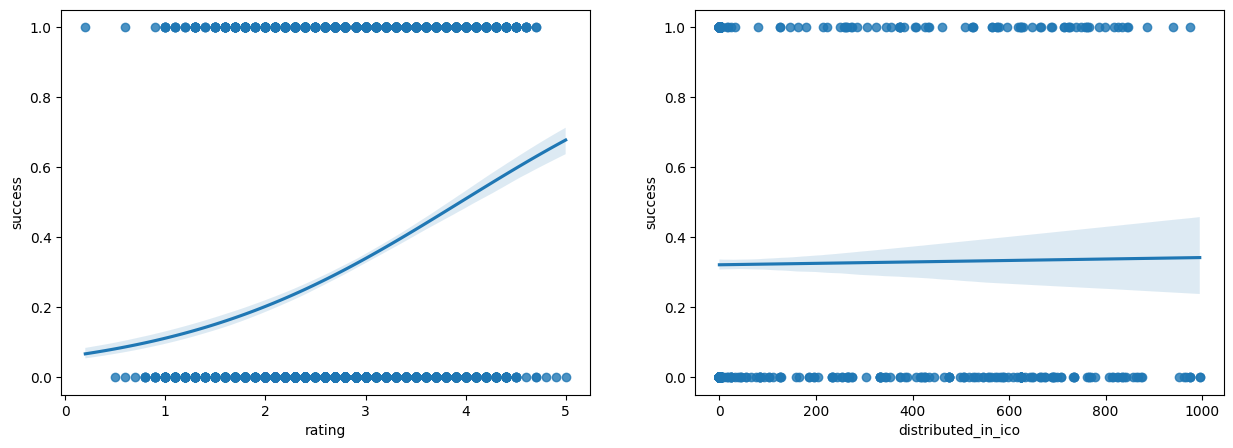

In [191]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the first regplot
sns.regplot(data=df, x='rating', y='success', logistic=True, ax=ax[0])

df['distributed_in_ico'] = pd.to_numeric(df['distributed_in_ico'], errors='coerce')

# Plot the second regplot
sns.regplot(data=df, x='distributed_in_ico', y='success', logistic=True, ax=ax[1])

In [192]:
df.columns.values

array(['country', 'price_usd', 'success', 'distributed_in_ico',
       'sold_tokens', 'token_for_sale', 'whitelist', 'kyc', 'bonus',
       'restricted_areas', 'min_investment', 'mvp', 'pre_ico_price_usd',
       'accepting', 'link_white_paper', 'linkedin_link', 'github_link',
       'website', 'rating', 'teamsize', 'ERC20', 'ico_length',
       'pre_ico_length', ' BCH', ' BTC', ' DASH', ' ETC', ' ETH', ' EUR',
       ' Fiat', ' LTC', ' USD', ' USDT', ' XMR', ' XRP', ' ZEC', 'BTC',
       'ETH', 'AFG', 'CAN', 'CHN', 'CUB', 'ETH', 'IRN', 'IRQ', 'KOR',
       'LBY', 'LKA', 'PAK', 'PRK', 'SDN', 'SGP', 'SOM', 'SYR', 'TUN',
       'USA', 'YEM', 'not found'], dtype=object)

In [193]:
# Remove duplicate columns in the DataFrame
map = pd.DataFrame({'country': areas_dummies.columns, 'count': areas_dummies.sum(axis=0).values})

In [194]:
import plotly.express as px



fig = px.choropleth(map, locations='country', hover_name='country', hover_data=['count'],
                    projection='natural earth', locationmode='ISO-3', color='count')
fig.show()

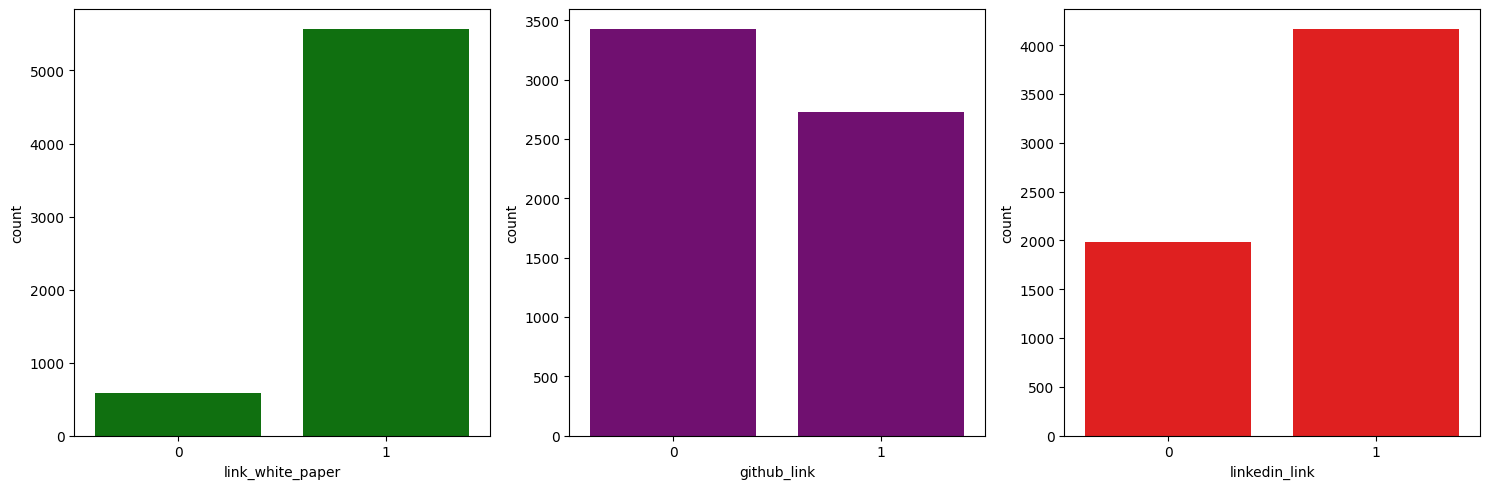

In [195]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=df, x='link_white_paper', ax=ax[0], color='green')
sns.countplot(data=df, x='github_link', ax=ax[1], color='purple')
sns.countplot(data=df, x='linkedin_link', ax=ax[2], color='red')
plt.tight_layout()

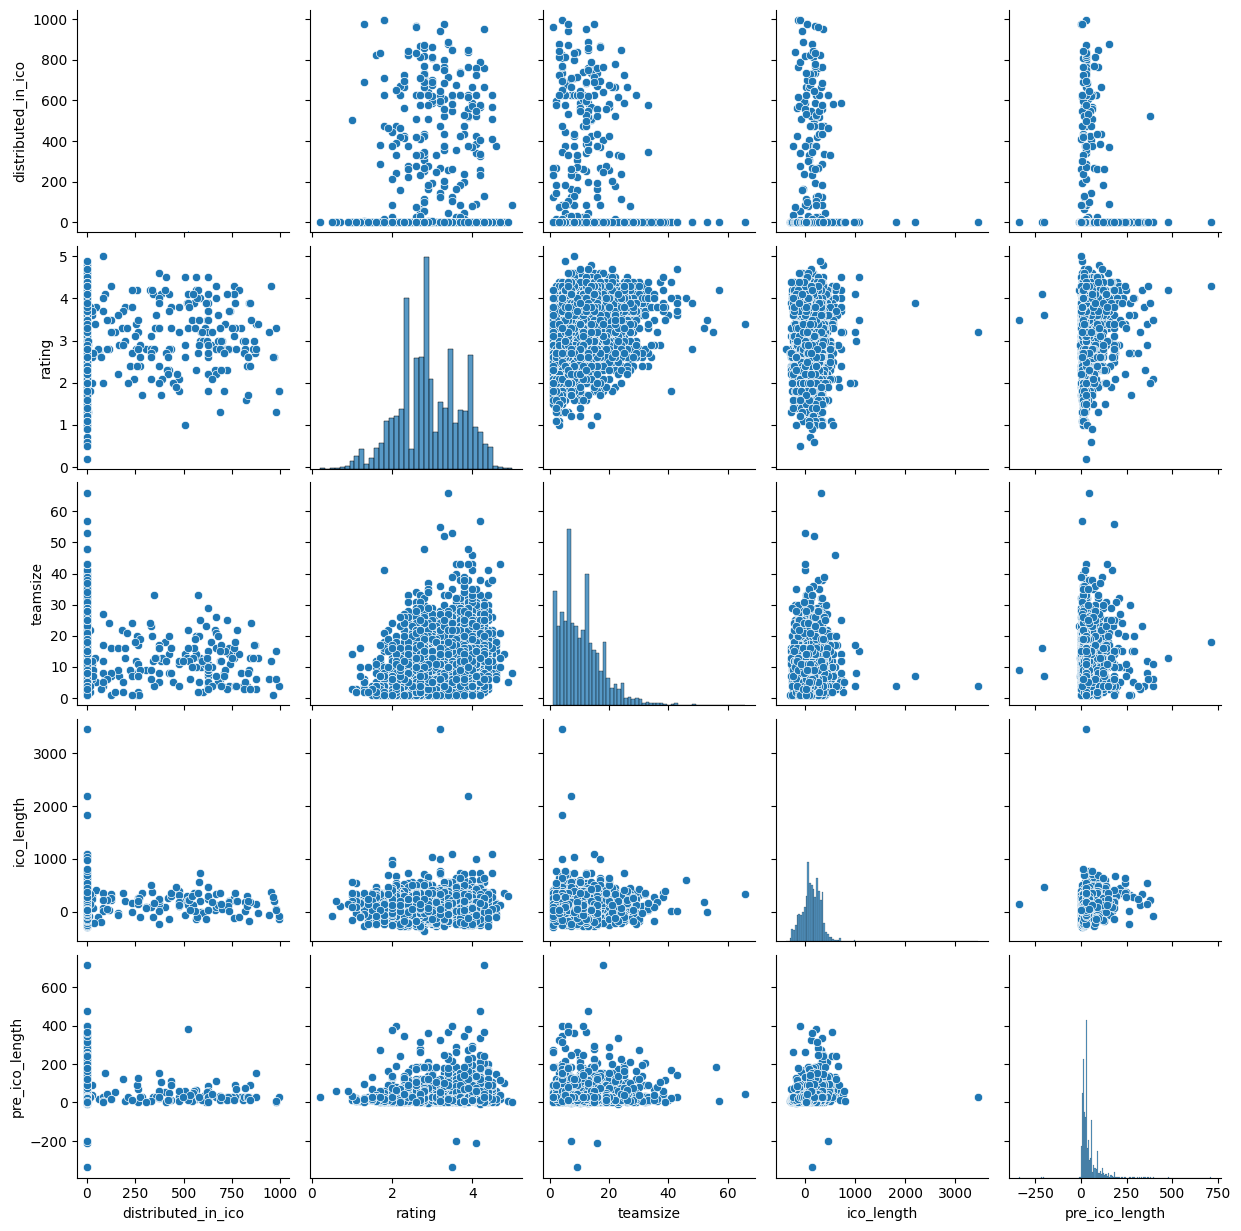

In [196]:
sns.pairplot(df[['distributed_in_ico', 'sold_tokens', 'rating', 'teamsize', 'ico_length', 
                 'pre_ico_length']], diag_kind='hist')

In [197]:
df['distributed_in_ico'] = np.where(df['distributed_in_ico'] > 1, np.nan, df['distributed_in_ico'])

(0.0, 1.0)

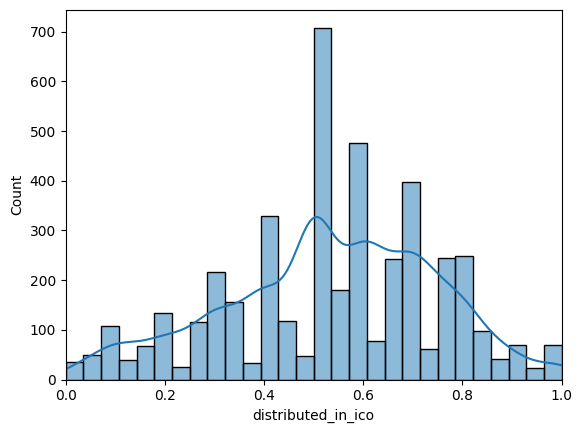

In [198]:
fig, ax = plt.subplots()
sns.histplot(df['distributed_in_ico'], kde=True, ax = ax)
ax.set_xlim(0, 1)

In [199]:
df.columns.values

array(['country', 'price_usd', 'success', 'distributed_in_ico',
       'sold_tokens', 'token_for_sale', 'whitelist', 'kyc', 'bonus',
       'restricted_areas', 'min_investment', 'mvp', 'pre_ico_price_usd',
       'accepting', 'link_white_paper', 'linkedin_link', 'github_link',
       'website', 'rating', 'teamsize', 'ERC20', 'ico_length',
       'pre_ico_length', ' BCH', ' BTC', ' DASH', ' ETC', ' ETH', ' EUR',
       ' Fiat', ' LTC', ' USD', ' USDT', ' XMR', ' XRP', ' ZEC', 'BTC',
       'ETH', 'AFG', 'CAN', 'CHN', 'CUB', 'ETH', 'IRN', 'IRQ', 'KOR',
       'LBY', 'LKA', 'PAK', 'PRK', 'SDN', 'SGP', 'SOM', 'SYR', 'TUN',
       'USA', 'YEM', 'not found'], dtype=object)

In [200]:
df.drop(columns=['sold_tokens'], inplace=True)

In [201]:
df[['amount', 'currency']] = df['min_investment'].str.split(' ', n=1, expand=True)


In [202]:
currencies = df['currency'].value_counts().reset_index()


In [203]:
df.columns.values

array(['country', 'price_usd', 'success', 'distributed_in_ico',
       'token_for_sale', 'whitelist', 'kyc', 'bonus', 'restricted_areas',
       'min_investment', 'mvp', 'pre_ico_price_usd', 'accepting',
       'link_white_paper', 'linkedin_link', 'github_link', 'website',
       'rating', 'teamsize', 'ERC20', 'ico_length', 'pre_ico_length',
       ' BCH', ' BTC', ' DASH', ' ETC', ' ETH', ' EUR', ' Fiat', ' LTC',
       ' USD', ' USDT', ' XMR', ' XRP', ' ZEC', 'BTC', 'ETH', 'AFG',
       'CAN', 'CHN', 'CUB', 'ETH', 'IRN', 'IRQ', 'KOR', 'LBY', 'LKA',
       'PAK', 'PRK', 'SDN', 'SGP', 'SOM', 'SYR', 'TUN', 'USA', 'YEM',
       'not found', 'amount', 'currency'], dtype=object)

In [204]:
df.drop(columns=['currency', 'amount', 'restricted_areas', 'accepting'], inplace=True)

In [205]:
df['price_usd'] = np.where(df['price_usd'].str.contains("="), np.nan, df['price_usd'])
df['pre_ico_price_usd'] = np.where(df['pre_ico_price_usd'].str.contains("="), np.nan, df['pre_ico_price_usd'])

In [206]:
df.isna().sum()

country                 22
price_usd              649
success                  0
distributed_in_ico    1734
token_for_sale        1238
whitelist             2437
kyc                     21
bonus                   21
min_investment        4162
mvp                   4903
pre_ico_price_usd     4628
link_white_paper         0
linkedin_link            0
github_link              0
website                  0
rating                 712
teamsize              1719
ERC20                  738
ico_length            3675
pre_ico_length        3553
 BCH                     0
 BTC                     0
 DASH                    0
 ETC                     0
 ETH                     0
 EUR                     0
 Fiat                    0
 LTC                     0
 USD                     0
 USDT                    0
 XMR                     0
 XRP                     0
 ZEC                     0
BTC                      0
ETH                      0
AFG                      0
CAN                      0
C

In [207]:
df['mvp'] = df['mvp'].replace({'Available': 1}).fillna(0)

/var/folders/zm/k7mfmhq51gv7d8g3r5dwtjj00000gn/T/ipykernel_85547/359668041.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [208]:
df.drop(columns=['min_investment'], errors='ignore', inplace=True)
df['pre_ico_price_usd'] = pd.to_numeric(df['pre_ico_price_usd'], errors='coerce')
df['price_usd'] = pd.to_numeric(df['price_usd'], errors='coerce')

<Axes: >

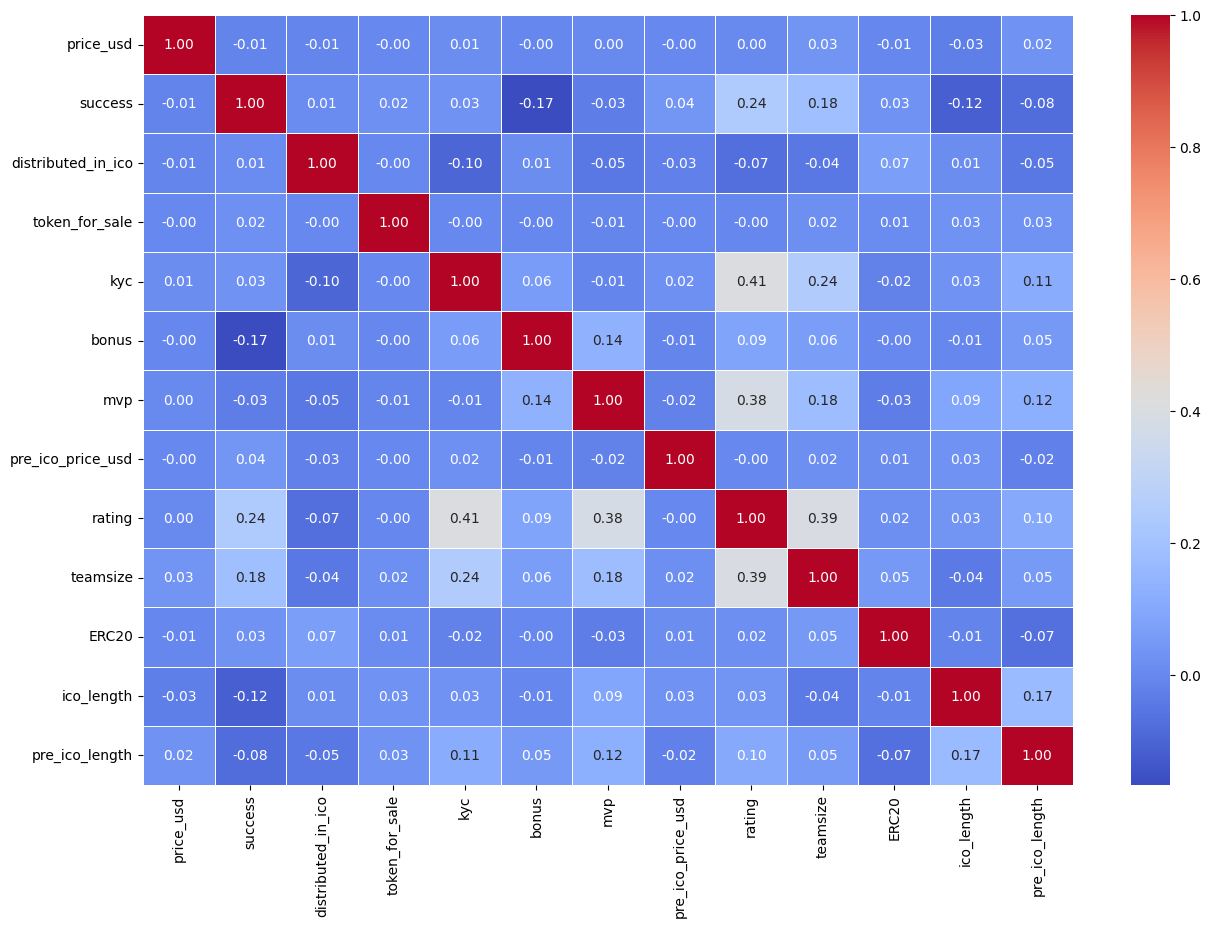

In [209]:
num_col = df.select_dtypes(exclude='object').columns
cat_col = df.select_dtypes(include='object').columns
num_col1 = list(set(df.columns).intersection(accepting_dummies.columns))
num_col2 = list(set(df.columns).intersection(areas_dummies.columns))
# Combine num_col1 and num_col2 to avoid duplicate drops
columns_to_drop = set(num_col1 + num_col2)
num_col = num_col.drop(columns_to_drop)
num_col = num_col.drop(['link_white_paper', 'github_link', 'website', 'linkedin_link', 'whitelist'])
plt.figure(figsize=(15, 10))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)


In [212]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
np.random.seed(42)
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

binary_cols = ['kyc', 'bonus', 'mvp', 'whitelist', 'ERC20']
numeric_cols = [
    'price_usd', 'distributed_in_ico', 'token_for_sale',
    'pre_ico_price_usd', 'rating', 'teamsize',
    'ico_length', 'pre_ico_length'
]
categorical_cols = ['country']

# Binary: Mode Imputation
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

# Numeric: Mean Imputation + MinMax Scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Categorical: Fill missing with 'Unknown' + OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('binary', binary_transformer, binary_cols),
    ('numeric', numeric_transformer, numeric_cols),
    ('categorical', categorical_transformer, categorical_cols)
])


In [213]:
from sklearn.model_selection import train_test_split

# Replace with your real target column
X = df.drop(columns=['success'])
y = df['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

tree_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=42))
])

tree_pipeline.fit(X_train, y_train)
tree_score = tree_pipeline.score(X_test, y_test)
print("Decision Tree Accuracy:", tree_score)

Decision Tree Accuracy: 0.6365853658536585


In [215]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)
rf_score = rf_pipeline.score(X_test, y_test)
print("Random Forest Accuracy:", rf_score)

Random Forest Accuracy: 0.7308943089430894


In [216]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', SVC(kernel='rbf'))  # Try linear or poly if you like
])

svm_pipeline.fit(X_train, y_train)
svm_score = svm_pipeline.score(X_test, y_test)
print("SVM Accuracy:", svm_score)

SVM Accuracy: 0.6780487804878049


[LightGBM] [Info] Number of positive: 1655, number of negative: 3261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1439
[LightGBM] [Info] Number of data points in the train set: 4916, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336656 -> initscore=-0.678233
[LightGBM] [Info] Start training from score -0.678233
✅ LightGBM Results
Accuracy : 0.7171
Precision: 0.5814
Recall   : 0.4408
F1 Score : 0.5014
ROC AUC  : 0.7412

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       833
           1       0.58      0.44      0.50       397

    accuracy                           0.72      1230
   macro avg       0.67      0.64      0.65      1230
weighted avg       0.70      0.72      

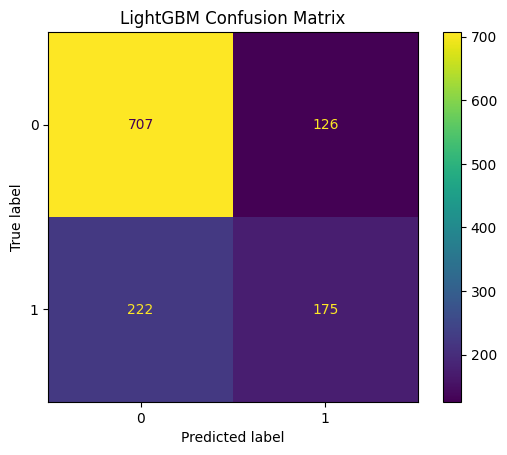

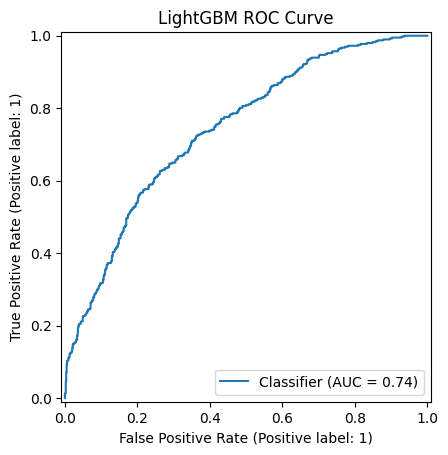

✅ XGBoost Results
Accuracy : 0.7179
Precision: 0.5828
Recall   : 0.4433
F1 Score : 0.5036
ROC AUC  : 0.7288

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       833
           1       0.58      0.44      0.50       397

    accuracy                           0.72      1230
   macro avg       0.67      0.65      0.65      1230
weighted avg       0.70      0.72      0.71      1230



/Users/wiley/miniconda3/envs/tf_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning:

[21:01:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




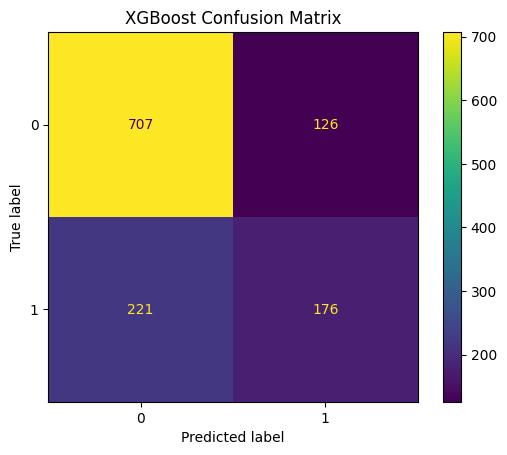

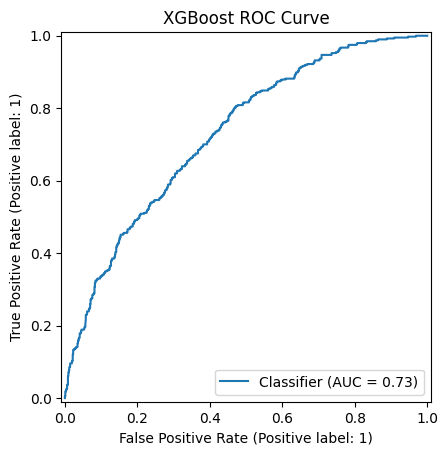

✅ Random Forest Results
Accuracy : 0.7309
Precision: 0.6299
Recall   : 0.4030
F1 Score : 0.4916
ROC AUC  : 0.7489

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       833
           1       0.63      0.40      0.49       397

    accuracy                           0.73      1230
   macro avg       0.69      0.65      0.65      1230
weighted avg       0.72      0.73      0.71      1230



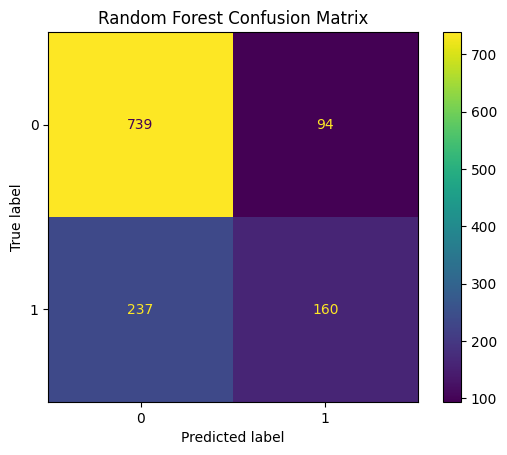

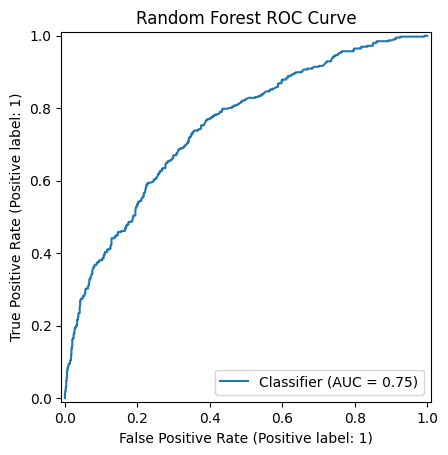

In [217]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    classification_report
)
import matplotlib.pyplot as plt

def evaluate_model(name, pipeline, X_test, y_test, probs, preds):
    print(f"✅ {name} Results")
    print(f"Accuracy : {accuracy_score(y_test, preds):.4f}")
    print(f"Precision: {precision_score(y_test, preds):.4f}")
    print(f"Recall   : {recall_score(y_test, preds):.4f}")
    print(f"F1 Score : {f1_score(y_test, preds):.4f}")
    print(f"ROC AUC  : {roc_auc_score(y_test, probs):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, preds))

    ConfusionMatrixDisplay.from_predictions(y_test, preds)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    RocCurveDisplay.from_predictions(y_test, probs)
    plt.title(f"{name} ROC Curve")
    plt.show()


# === LightGBM ===
lgb_model = LGBMClassifier(random_state=42)
lgb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', lgb_model)
])
lgb_pipeline.fit(X_train, y_train)
lgb_preds = lgb_pipeline.predict(X_test)
lgb_probs = lgb_pipeline.predict_proba(X_test)[:, 1]
evaluate_model("LightGBM", lgb_pipeline, X_test, y_test, lgb_probs, lgb_preds)


# === XGBoost ===
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', xgb_model)
])
xgb_pipeline.fit(X_train, y_train)
xgb_preds = xgb_pipeline.predict(X_test)
xgb_probs = xgb_pipeline.predict_proba(X_test)[:, 1]
evaluate_model("XGBoost", xgb_pipeline, X_test, y_test, xgb_probs, xgb_preds)

# === RandomForest ===
rf_pred = rf_pipeline.predict(X_test)
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]
evaluate_model("Random Forest", rf_pipeline, X_test, y_test, rf_probs, rf_pred)